# Library Imports

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

In [66]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [67]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [68]:
import pickle

# Data Loading

In [189]:
data = pd.read_csv('Copper_Set.csv')
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


# Initial Analysis

In [75]:
data.shape

(181673, 14)

In [76]:
data.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# Null Value Analysis

In [73]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [74]:
data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [190]:
data.drop(['id','item_date','delivery date'], axis = 1,inplace = True) #removing unwanted id, item_date, delivery_date columns

# data type correction

In [191]:
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce')
data['country'] = pd.to_numeric(data['country'], errors='coerce')
data['application'] = pd.to_numeric(data['application'], errors='coerce')
data['thickness'] = pd.to_numeric(data['thickness'], errors='coerce')
data['width'] = pd.to_numeric(data['width'], errors='coerce')
data['material_ref'] = data['material_ref'].str.lstrip('0')
data['product_ref'] = pd.to_numeric(data['product_ref'], errors='coerce')
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181672 non-null  float64
 1   customer       181672 non-null  float64
 2   country        181645 non-null  float64
 3   status         181671 non-null  object 
 4   item type      181673 non-null  object 
 5   application    181649 non-null  float64
 6   thickness      181672 non-null  float64
 7   width          181673 non-null  float64
 8   material_ref   103754 non-null  object 
 9   product_ref    181673 non-null  int64  
 10  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.2+ MB


In [81]:
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00


In [192]:
data['material_ref'] = data['material_ref'].fillna("unknown") #replacing null values of material_ref with unknown

In [83]:
data.isnull().sum()

quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
selling_price     1
dtype: int64

In [193]:
data.dropna(inplace = True) # dropping all other null values since they are very minimal

In [194]:
data.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
selling_price    0
dtype: int64

In [195]:
a = data['quantity tons'] <= 0
print(a.sum())
data.loc[a, 'quantity tons'] = np.nan

b = data['selling_price'] <= 0
print(b.sum())
data.loc[b, 'selling_price'] = np.nan

c = data['thickness'] <= 0
print(c.sum())
data.loc[c, 'thickness'] = np.nan

4
7
0


In [196]:
data.isnull().sum()

quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
selling_price    7
dtype: int64

In [197]:
data.dropna(inplace=True)

In [198]:
print(data.isnull().sum())
print()
print(data.shape)

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
selling_price    0
dtype: int64

(181628, 11)


# EDA

In [199]:
data['status'].value_counts()

status
Won                116000
Lost                34433
Not lost for AM     19566
Revised              4276
To be approved       4169
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

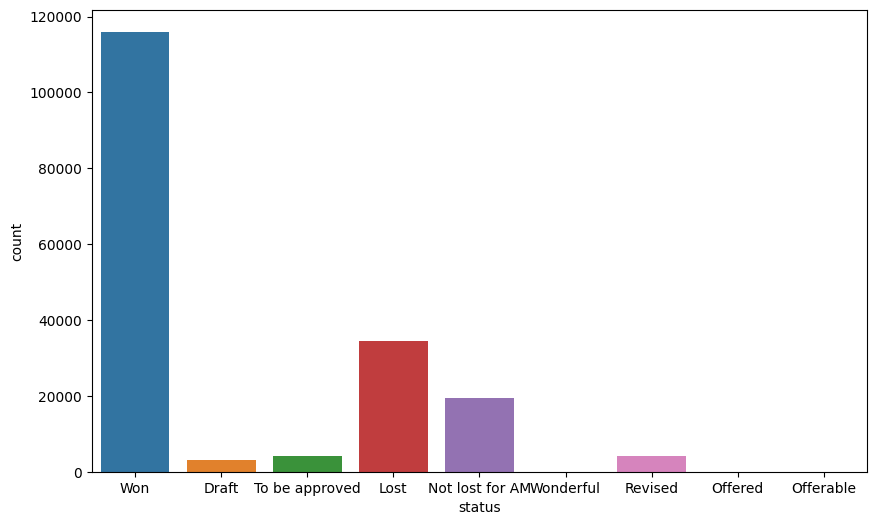

In [200]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'status', data=data)

In [201]:
num_cols = [column for column in data.columns if data[column].dtype == 'float64']
print(num_cols)

['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'selling_price']


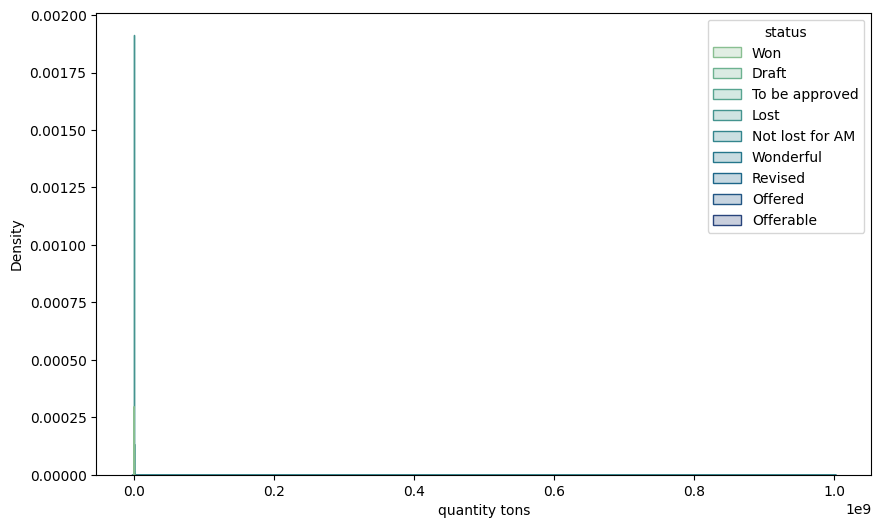

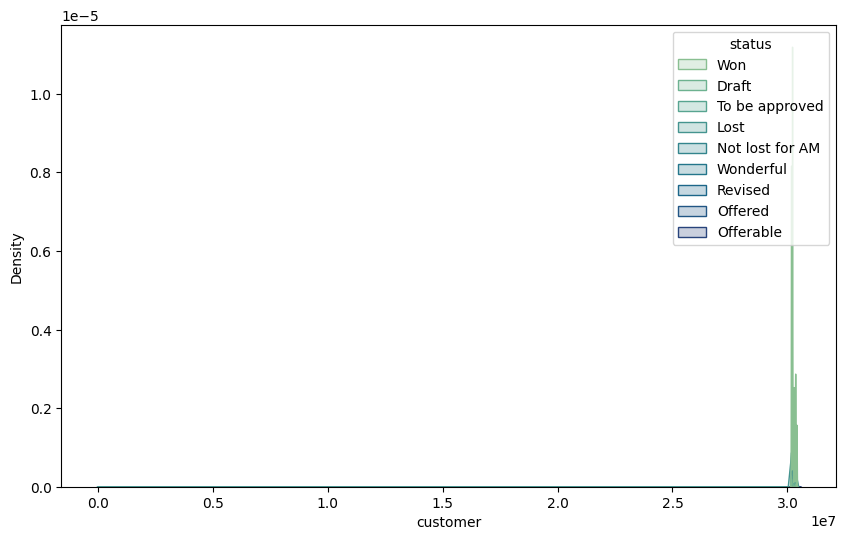

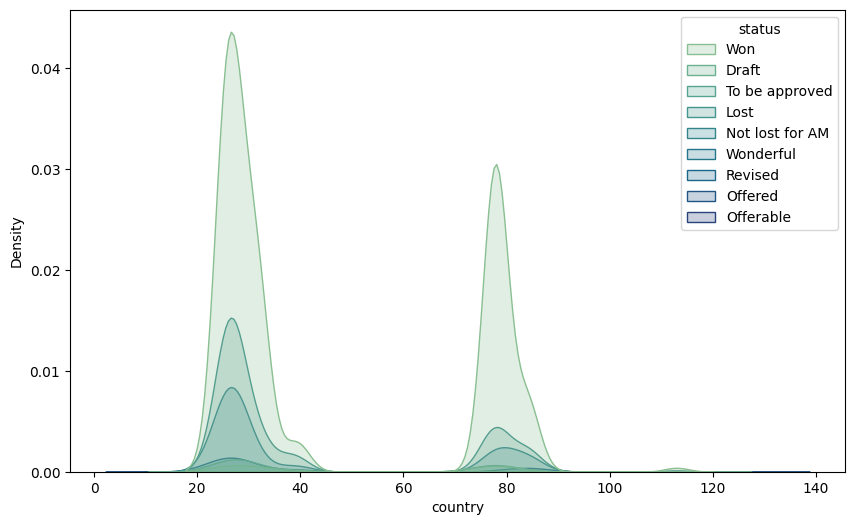

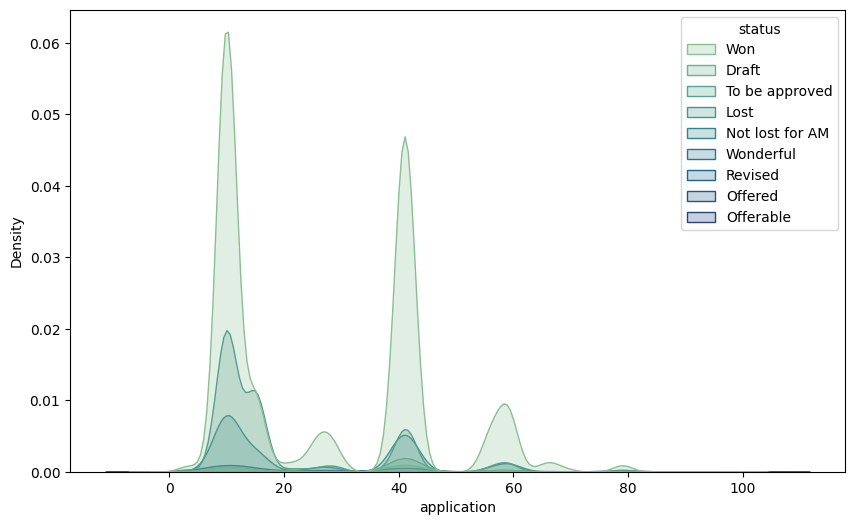

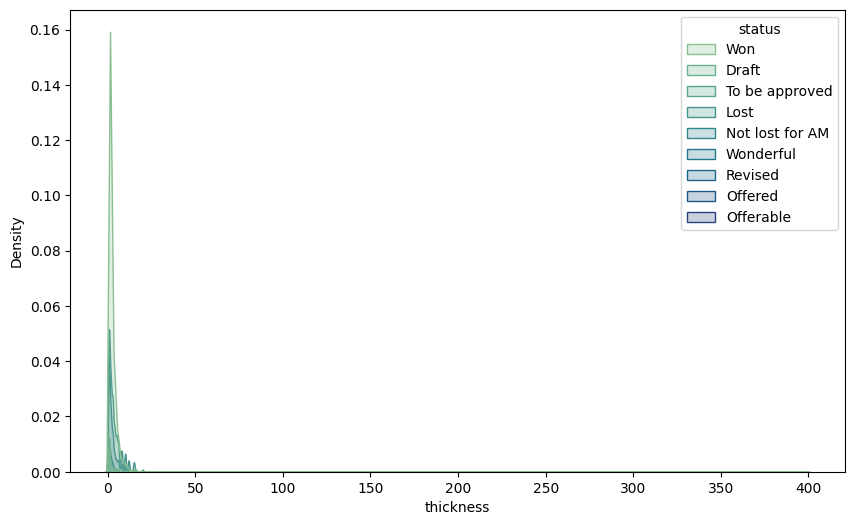

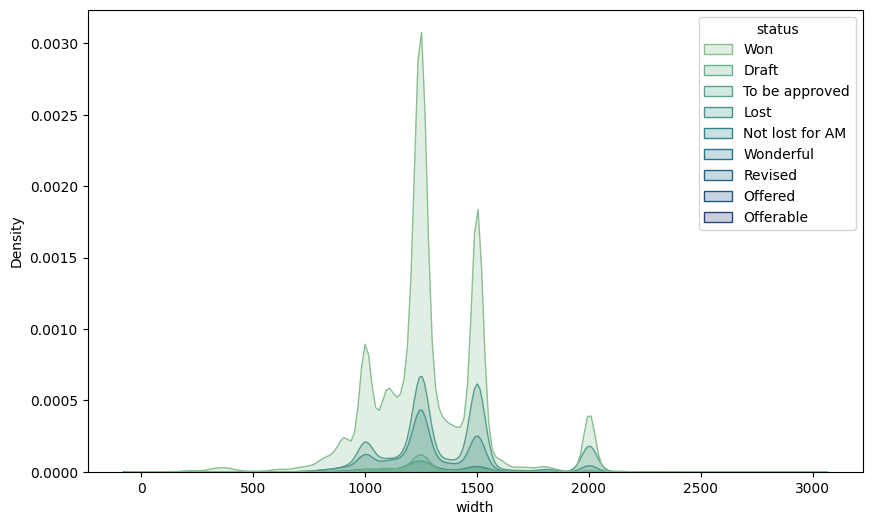

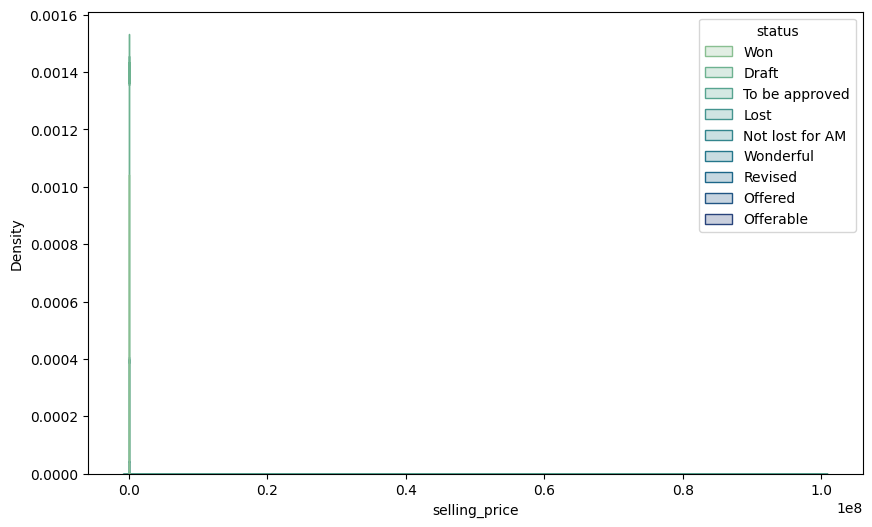

In [202]:
for columns in num_cols:
    plt.figure(figsize = (10,6))
    sns.kdeplot(data = data, x = columns, hue = 'status', palette = "crest", fill=True)
    plt.show()

<Axes: xlabel='quantity tons', ylabel='Density'>

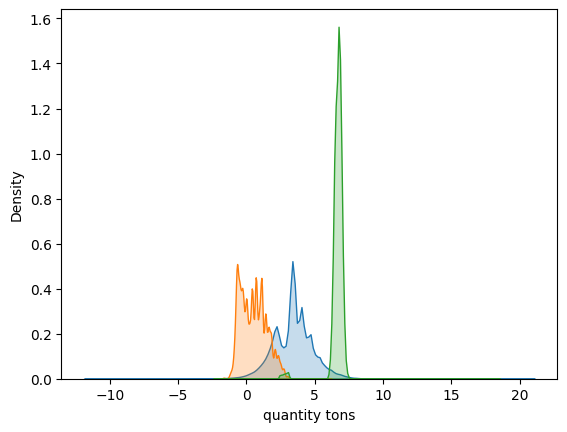

In [203]:
#skewed data handling using log transformation
data['quantity tons'] = np.log(data['quantity tons'])
data['thickness'] = np.log(data['thickness'])
data['selling_price'] = np.log(data['selling_price'])

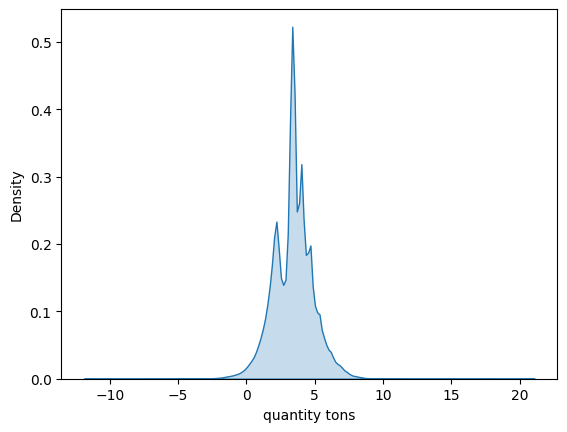

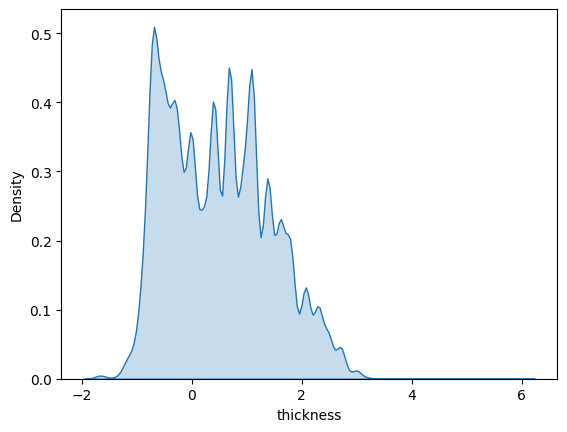

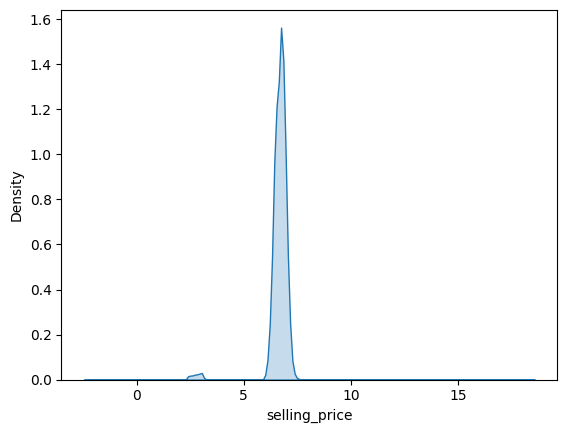

In [204]:
sns.kdeplot(data=data, x=data['quantity tons'], fill=True)
plt.show()
sns.kdeplot(data=data, x=data['thickness'], fill=True)
plt.show()
sns.kdeplot(data=data, x=data['selling_price'], fill=True)
plt.show()

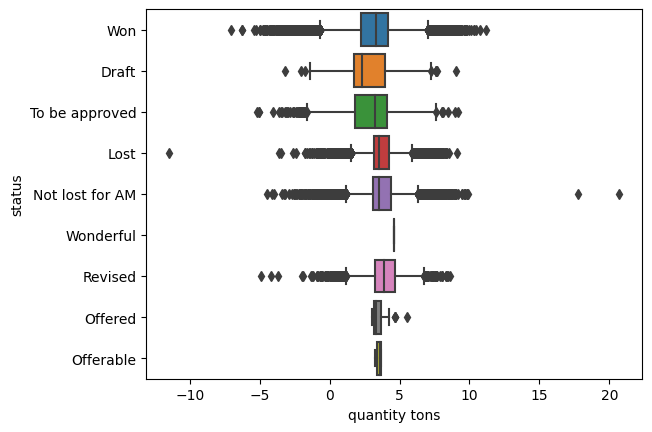

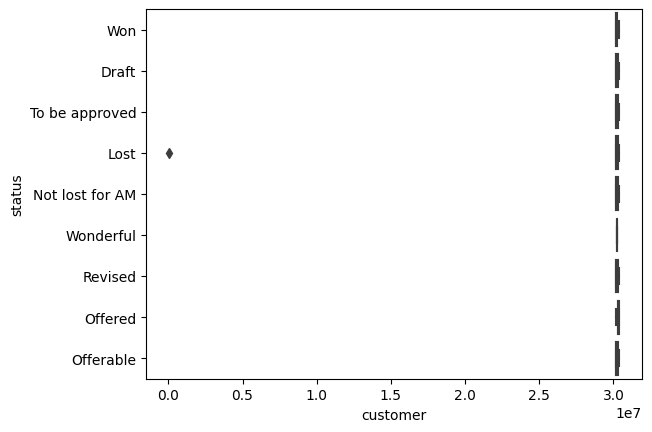

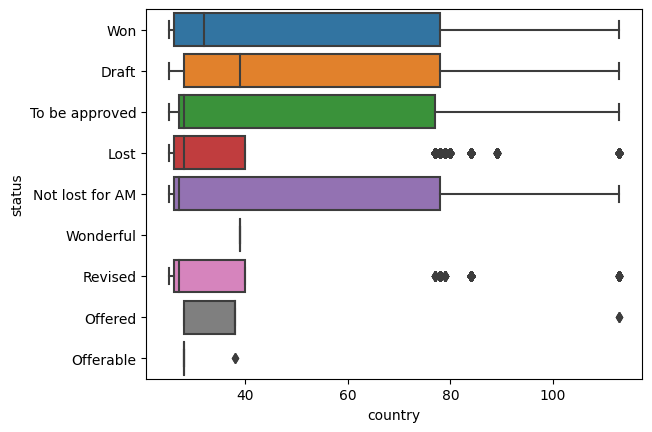

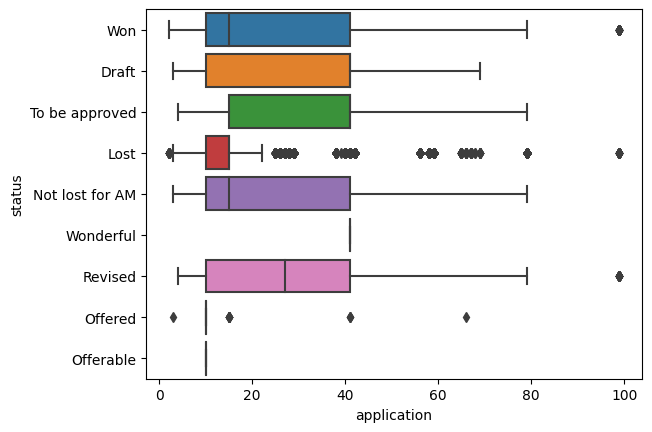

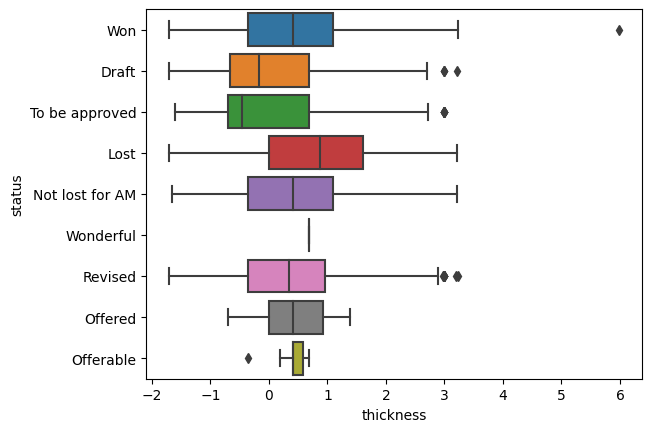

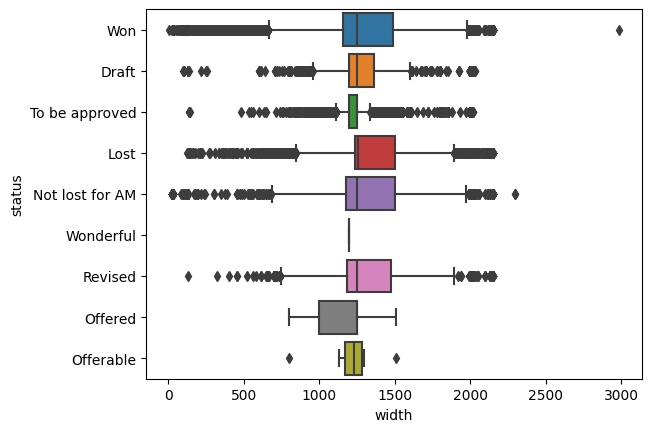

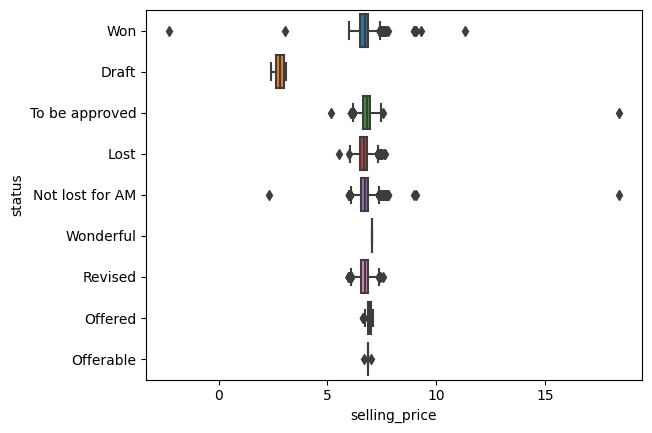

In [205]:
#outlier detection
for column in num_cols:
    sns.boxplot(data=data, x = column, y = "status")
    plt.show()

<Axes: >

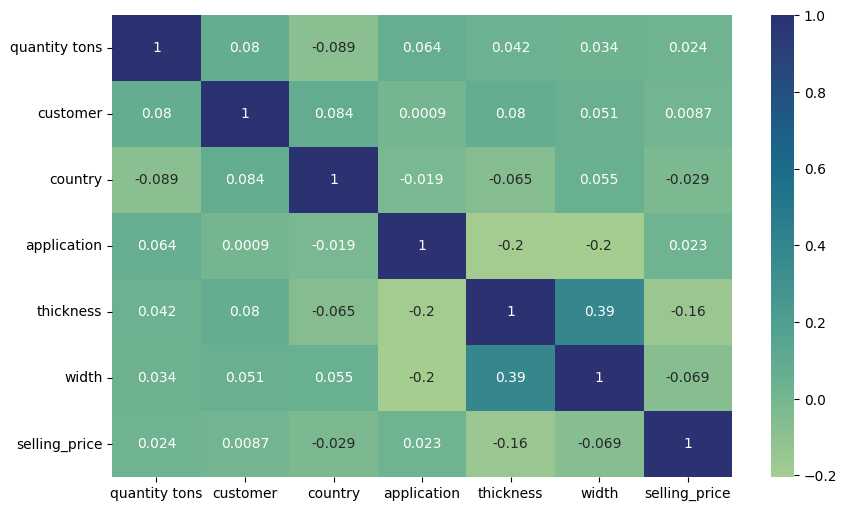

In [206]:
plt.figure(figsize=(10,6))
corr = data[['quantity tons', 'customer', 'country', 'application', 'thickness', 'width','selling_price']].corr()
sns.heatmap(corr, annot=True, cmap="crest")

# Data Preprocessing - Regression model

In [207]:
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
0,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,6.749931
1,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,6.953684
2,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,6.468211
3,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,6.643790
4,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,6.357842


In [208]:
X = data.iloc[:,:-1]
X

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref
0,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778
1,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718
2,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377
3,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718
4,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665
...,...,...,...,...,...,...,...,...,...,...
181667,4.670802,30200854.0,25.0,Won,W,41.0,-0.040822,1240.0,1000222,164141591
181668,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,1000777,164141591
181669,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,1000227,164141591
181670,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,1004216,164141591


In [209]:
y = data['selling_price']
y

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181667    6.400257
181668    6.381816
181669    6.378426
181670    6.428105
181672    6.408529
Name: selling_price, Length: 181628, dtype: float64

In [210]:
numeric_column = [column for column in X.columns if X[column].dtype == "float64"]
print("Numeric columns:", numeric_column)
categorical_column = [column for column in X.columns if X[column].dtype != "float64"]
print("Categorical columns:", categorical_column)

Numeric columns: ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width']
Categorical columns: ['status', 'item type', 'material_ref', 'product_ref']


#### Handling missing values

In [211]:
X['material_ref'].value_counts()

material_ref
unknown                          77883
DX51D+Z                            922
G9010                              856
DC01 RED.FLAT KUCHNIA EKO 2.2      777
DC01                               725
                                 ...  
3050080                              1
4001568                              1
3016460                              1
3016459                              1
202006170005.IO.1.1                  1
Name: count, Length: 16561, dtype: int64

In [212]:
X['material_ref'] = X['material_ref'].replace('unknown',X['material_ref'].value_counts().index[1]) #replacing unknown with most frequent value

In [213]:
X['material_ref'].value_counts()

material_ref
DX51D+Z                          78805
G9010                              856
DC01 RED.FLAT KUCHNIA EKO 2.2      777
DC01                               725
G9006                              671
                                 ...  
3050080                              1
4001568                              1
3016460                              1
3016459                              1
202006170005.IO.1.1                  1
Name: count, Length: 16560, dtype: int64

#### Scaling

In [214]:
SS = StandardScaler()
X_standardized = SS.fit_transform(X[numeric_column])

#### Handing categorical features

In [215]:
OHE = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
X_OHE = OHE.fit_transform(X[['item type']])
X_OHE2 = OHE.fit_transform(X[['product_ref']])

In [216]:
OE = OrdinalEncoder()
X_OE = OE.fit_transform(X[['status']])

In [217]:
X_final = np.concatenate((X_standardized,X_OHE,X_OHE2,X_OE),axis=1)

In [218]:
X_final.shape

(181628, 47)

## Model Building

In [219]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size =0.25, random_state =40)

In [220]:
dtr = DecisionTreeRegressor()
param_grid = {'max_depth' : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
gs = GridSearchCV(dtr,param_grid,cv=5)

In [221]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [222]:
gs.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [228]:
best_model = gs.best_estimator_

In [229]:
y_pred = best_model.predict(X_test)

## Metrics and Evaluation

In [230]:
print("Train data score:", gs.score(X_train,y_train))
print("Test data score:", gs.score(X_test,y_test))

Train data score: 0.9202308837784818
Test data score: 0.8728601780684795


In [231]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.040094876224826374
R-squared: 0.8728601780684795


In [242]:
#saving the model using pickling
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as file2:
    pickle.dump(X_standardized, file2)
with open('ohe1.pkl', 'wb') as file3:
    pickle.dump(X_OHE, file3)
with open('ohe2.pkl', 'wb') as file4:
    pickle.dump(X_OHE2, file4)
with open('oe.pkl', 'wb') as file5:
    pickle.dump(X_OE, file5)

## Classification model

In [233]:
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
0,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,6.749931
1,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,6.953684
2,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,6.468211
3,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,6.643790
4,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,6.357842


In [235]:
data_clf = data[data['status'].isin(['Won', 'Lost'])]

In [236]:
data_clf.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
0,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,6.749931
1,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,6.953684
2,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,6.468211
3,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,6.643790
4,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,6.357842


In [237]:
data_clf['status'].value_counts()

status
Won     116000
Lost     34433
Name: count, dtype: int64

In [238]:
data_clf.shape

(150433, 11)

In [239]:
X_clf = data_clf.drop('status', axis=1)
X_clf.head()

,quantity tons,customer,country,item type,application,thickness,width,material_ref,product_ref,selling_price
0,3.991779,30156308.0,28.0,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,6.749931
1,6.643822,30202938.0,25.0,W,41.0,-0.223144,1210.0,104991,1668701718,6.953684
2,5.956169,30153963.0,30.0,WI,28.0,-0.967584,952.0,S0380700,628377,6.468211
3,5.310301,30349574.0,32.0,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,6.643790
4,6.666354,30211560.0,28.0,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,6.357842


In [240]:
y_clf = data_clf['status']
y_clf

0         Won
1         Won
2         Won
3         Won
4         Won
         ... 
181667    Won
181668    Won
181669    Won
181670    Won
181672    Won
Name: status, Length: 150433, dtype: object

In [241]:
numeric_columns = [column for column in X_clf.columns if X_clf[column].dtype == "float64"]
print("Numeric columns:", numeric_columns)
categorical_columns = [column for column in X_clf.columns if X_clf[column].dtype != "float64"]
print("Categorical columns:", categorical_columns)

Numeric columns: ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'selling_price']
Categorical columns: ['item type', 'material_ref', 'product_ref']


#### Scaling

In [243]:
X_clf_Standardized = SS.fit_transform(X_clf[numeric_columns])

#### Handling Categorical features

In [244]:
X_clf_OHE = OHE.fit_transform(X_clf[['item type']])
X_clf_OHE2 = OHE.fit_transform(X_clf[['product_ref']])

In [246]:
X_clf_final = np.concatenate((X_clf_Standardized,X_clf_OHE,X_clf_OHE2), axis=1)

In [247]:
X_clf_final.shape

(150433, 46)

#### Model Building

In [248]:
X_clf_train,X_clf_test,y_clf_train,y_clf_test = train_test_split(X_clf_final,y_clf,test_size = 0.25, random_state = 40)

In [249]:
dtc = DecisionTreeClassifier()
param_grid = {'max_depth' : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
grid = GridSearchCV(dtc,param_grid,cv=5)

In [250]:
grid.fit(X_clf_train, y_clf_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [251]:
grid.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [253]:
best_model2 = grid.best_estimator_
best_model2

DecisionTreeClassifier(max_depth=20, max_features='log2')

In [254]:
y_clf_pred = best_model2.predict(X_clf_test)

## Metrics and Evaluation

In [255]:
print("Train data Score:", grid.score(X_clf_train, y_clf_train))
print("Test data Score:", grid.score(X_clf_test, y_clf_test))

Train data Score: 0.91001028150039
Test data Score: 0.8642346246908984


In [257]:
print("Accuracy score:", accuracy_score(y_clf_test,y_clf_pred))
print("Confusion matrix:", confusion_matrix(y_clf_test,y_clf_pred))
print("Classification report:", classification_report(y_clf_test,y_clf_pred))

Accuracy score: 0.8642346246908984
Confusion matrix: [[ 5421  3176]
 [ 1930 27082]]
Classification report:               precision    recall  f1-score   support

        Lost       0.74      0.63      0.68      8597
         Won       0.90      0.93      0.91     29012

    accuracy                           0.86     37609
   macro avg       0.82      0.78      0.80     37609
weighted avg       0.86      0.86      0.86     37609



In [263]:
#saving model using pickling
with open('model_c.pkl', 'wb') as file:
    pickle.dump(best_model2, file)
with open('scale_c.pkl', 'wb') as file2:
    pickle.dump(X_clf_Standardized, file2)
with open('ohe1_c.pkl', 'wb') as file3:
    pickle.dump(X_clf_OHE, file3)
with open('ohe2_c.pkl', 'wb') as file4:
    pickle.dump(X_clf_OHE2, file4)